In [94]:
#Librerias
#Data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from IPython.display import Image as PImage
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn import tree
import seaborn as sb
import matplotlib.pyplot as plt
from IPython.display import Image as PImage
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor

In [76]:
# visualizacion de data 
df_train = pd.read_csv("train.csv")
print(df_train)
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [77]:
# verificacion de eliminacion de datos NULL
df_train = df_train.drop((missing_data[missing_data['Total'] > 0]).index,1)
df_train.isnull().sum().max() 

0

In [78]:
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [79]:
#VARIABLE BINARIA
df_train["bool"] = np.where(df_train['SalePrice']>214000.000000 , 1, 0)
df_train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,bool
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,0
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,0
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,1
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,0
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,8,2007,WD,Normal,175000,0
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2010,WD,Normal,210000,0
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2500,5,2010,WD,Normal,266500,1
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,4,2010,WD,Normal,142125,0


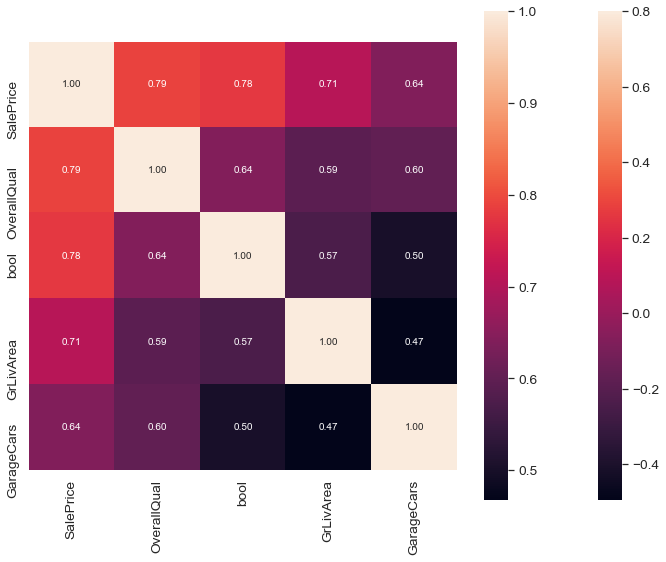

In [80]:
# Matriz de correlación


corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

k = 5 # Número de variables.
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [81]:
#Definiendo Variables

#De acuerdo al analisis  se toma como referencia para iniciar el aprendizaje, tres variables que afectan significativamente el precio 

train_a = df_train['bool'].astype("int")
train_b = df_train.loc[:,["OverallQual","GrLivArea","GarageCars"]]
print(train_a)
print(train_b)

0       0
1       0
2       1
3       0
4       1
       ..
1455    0
1456    0
1457    1
1458    0
1459    0
Name: bool, Length: 1460, dtype: int32
      OverallQual  GrLivArea  GarageCars
0               7       1710           2
1               6       1262           2
2               7       1786           2
3               7       1717           3
4               8       2198           3
...           ...        ...         ...
1455            6       1647           2
1456            6       2073           2
1457            7       2340           1
1458            5       1078           1
1459            5       1256           1

[1460 rows x 3 columns]


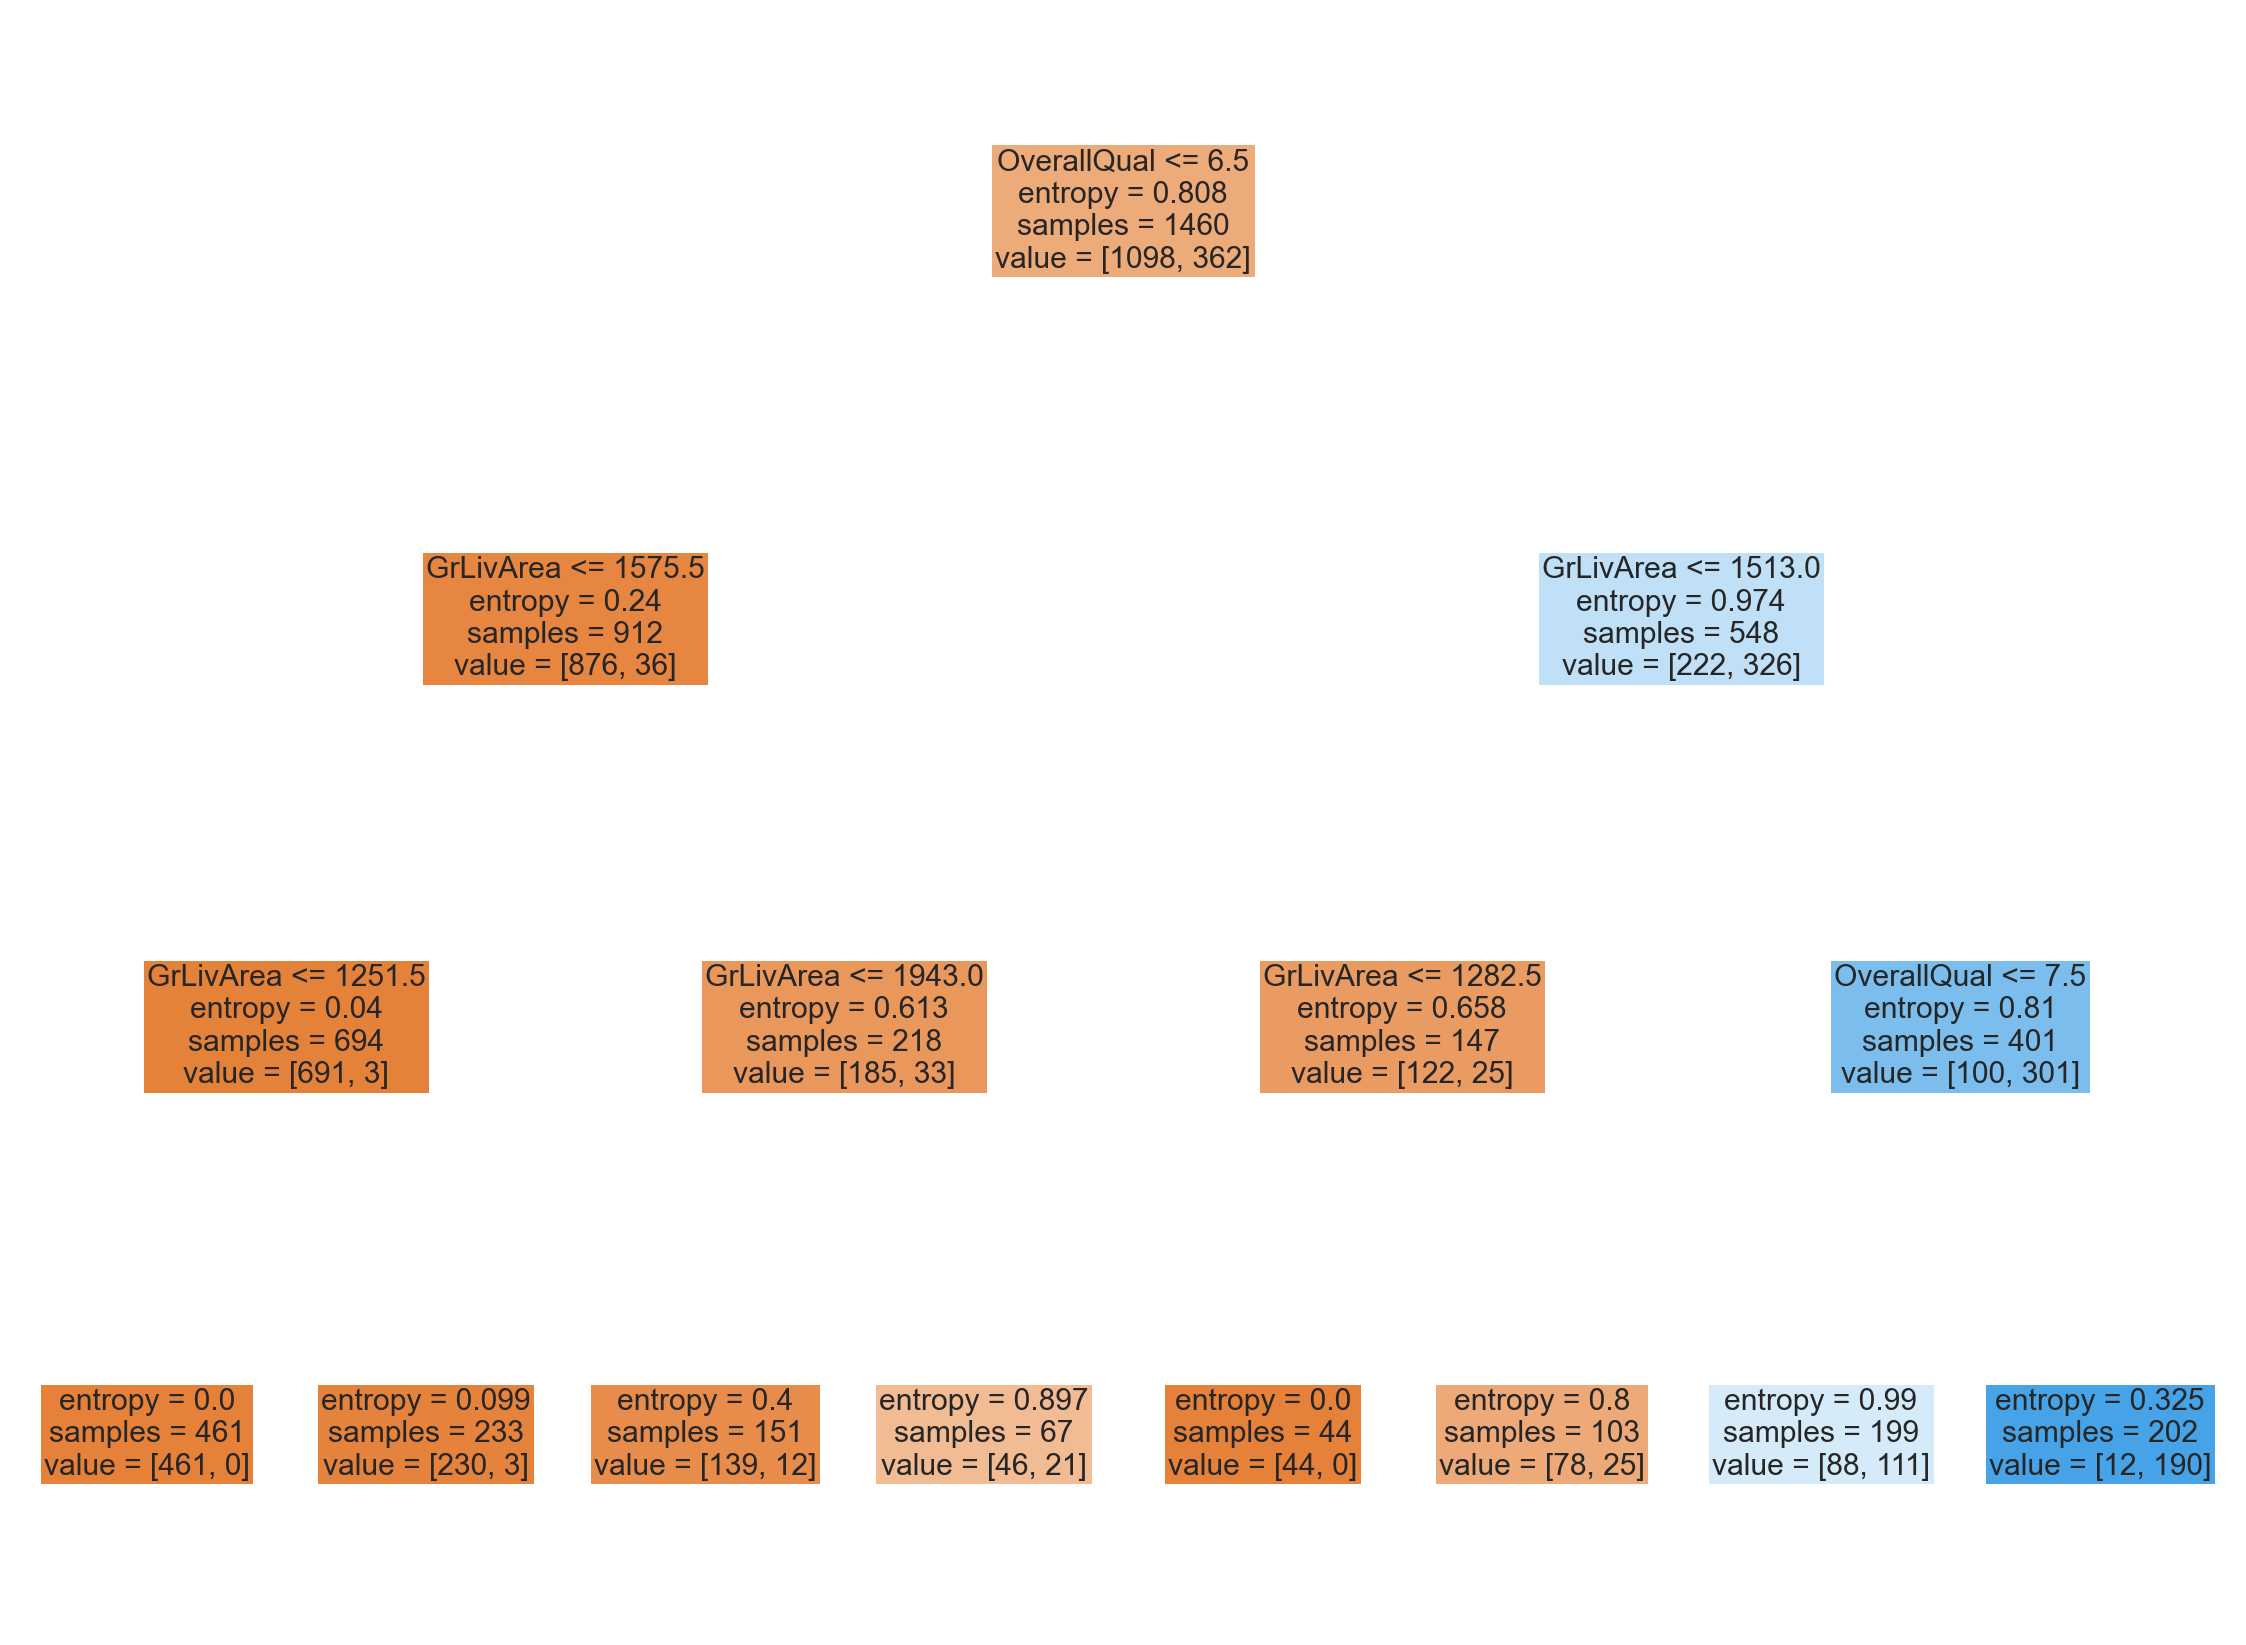

In [82]:
#Clasificador de árbol de decisión

tr_Dec = DecisionTreeClassifier(criterion='entropy',min_samples_split=20,min_samples_leaf=10,max_depth =3)
dsc=tr_Dec.fit(train_b, train_a)

tree.plot_tree(dsc, filled=1,fontsize=30,feature_names=("OverallQual","GrLivArea","GarageCars"))
plt.rcParams["figure.figsize"] = (40,30)
plt.show()




In [83]:
confusion_matrix(train_a, dsc.predict(train_b))




array([[998, 100],
       [ 61, 301]], dtype=int64)

In [84]:
accuracy_score(train_a, dsc.predict(train_b))

0.8897260273972603

In [85]:
recall_score(train_a, dsc.predict(train_b))

0.8314917127071824

In [86]:
precision_score(train_a, dsc.predict(train_b))

0.7506234413965087

In [88]:
f1_score(train_a, dsc.predict(train_b))

0.7889908256880734

In [90]:
target_names = ["OverallQual","GrLivArea","GarageCars"]
print(classification_report(train_a, dsc.predict(train_b)))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      1098
           1       0.75      0.83      0.79       362

    accuracy                           0.89      1460
   macro avg       0.85      0.87      0.86      1460
weighted avg       0.89      0.89      0.89      1460



In [96]:
#Curva ROC
prb = dsc.predict_proba(train_b)

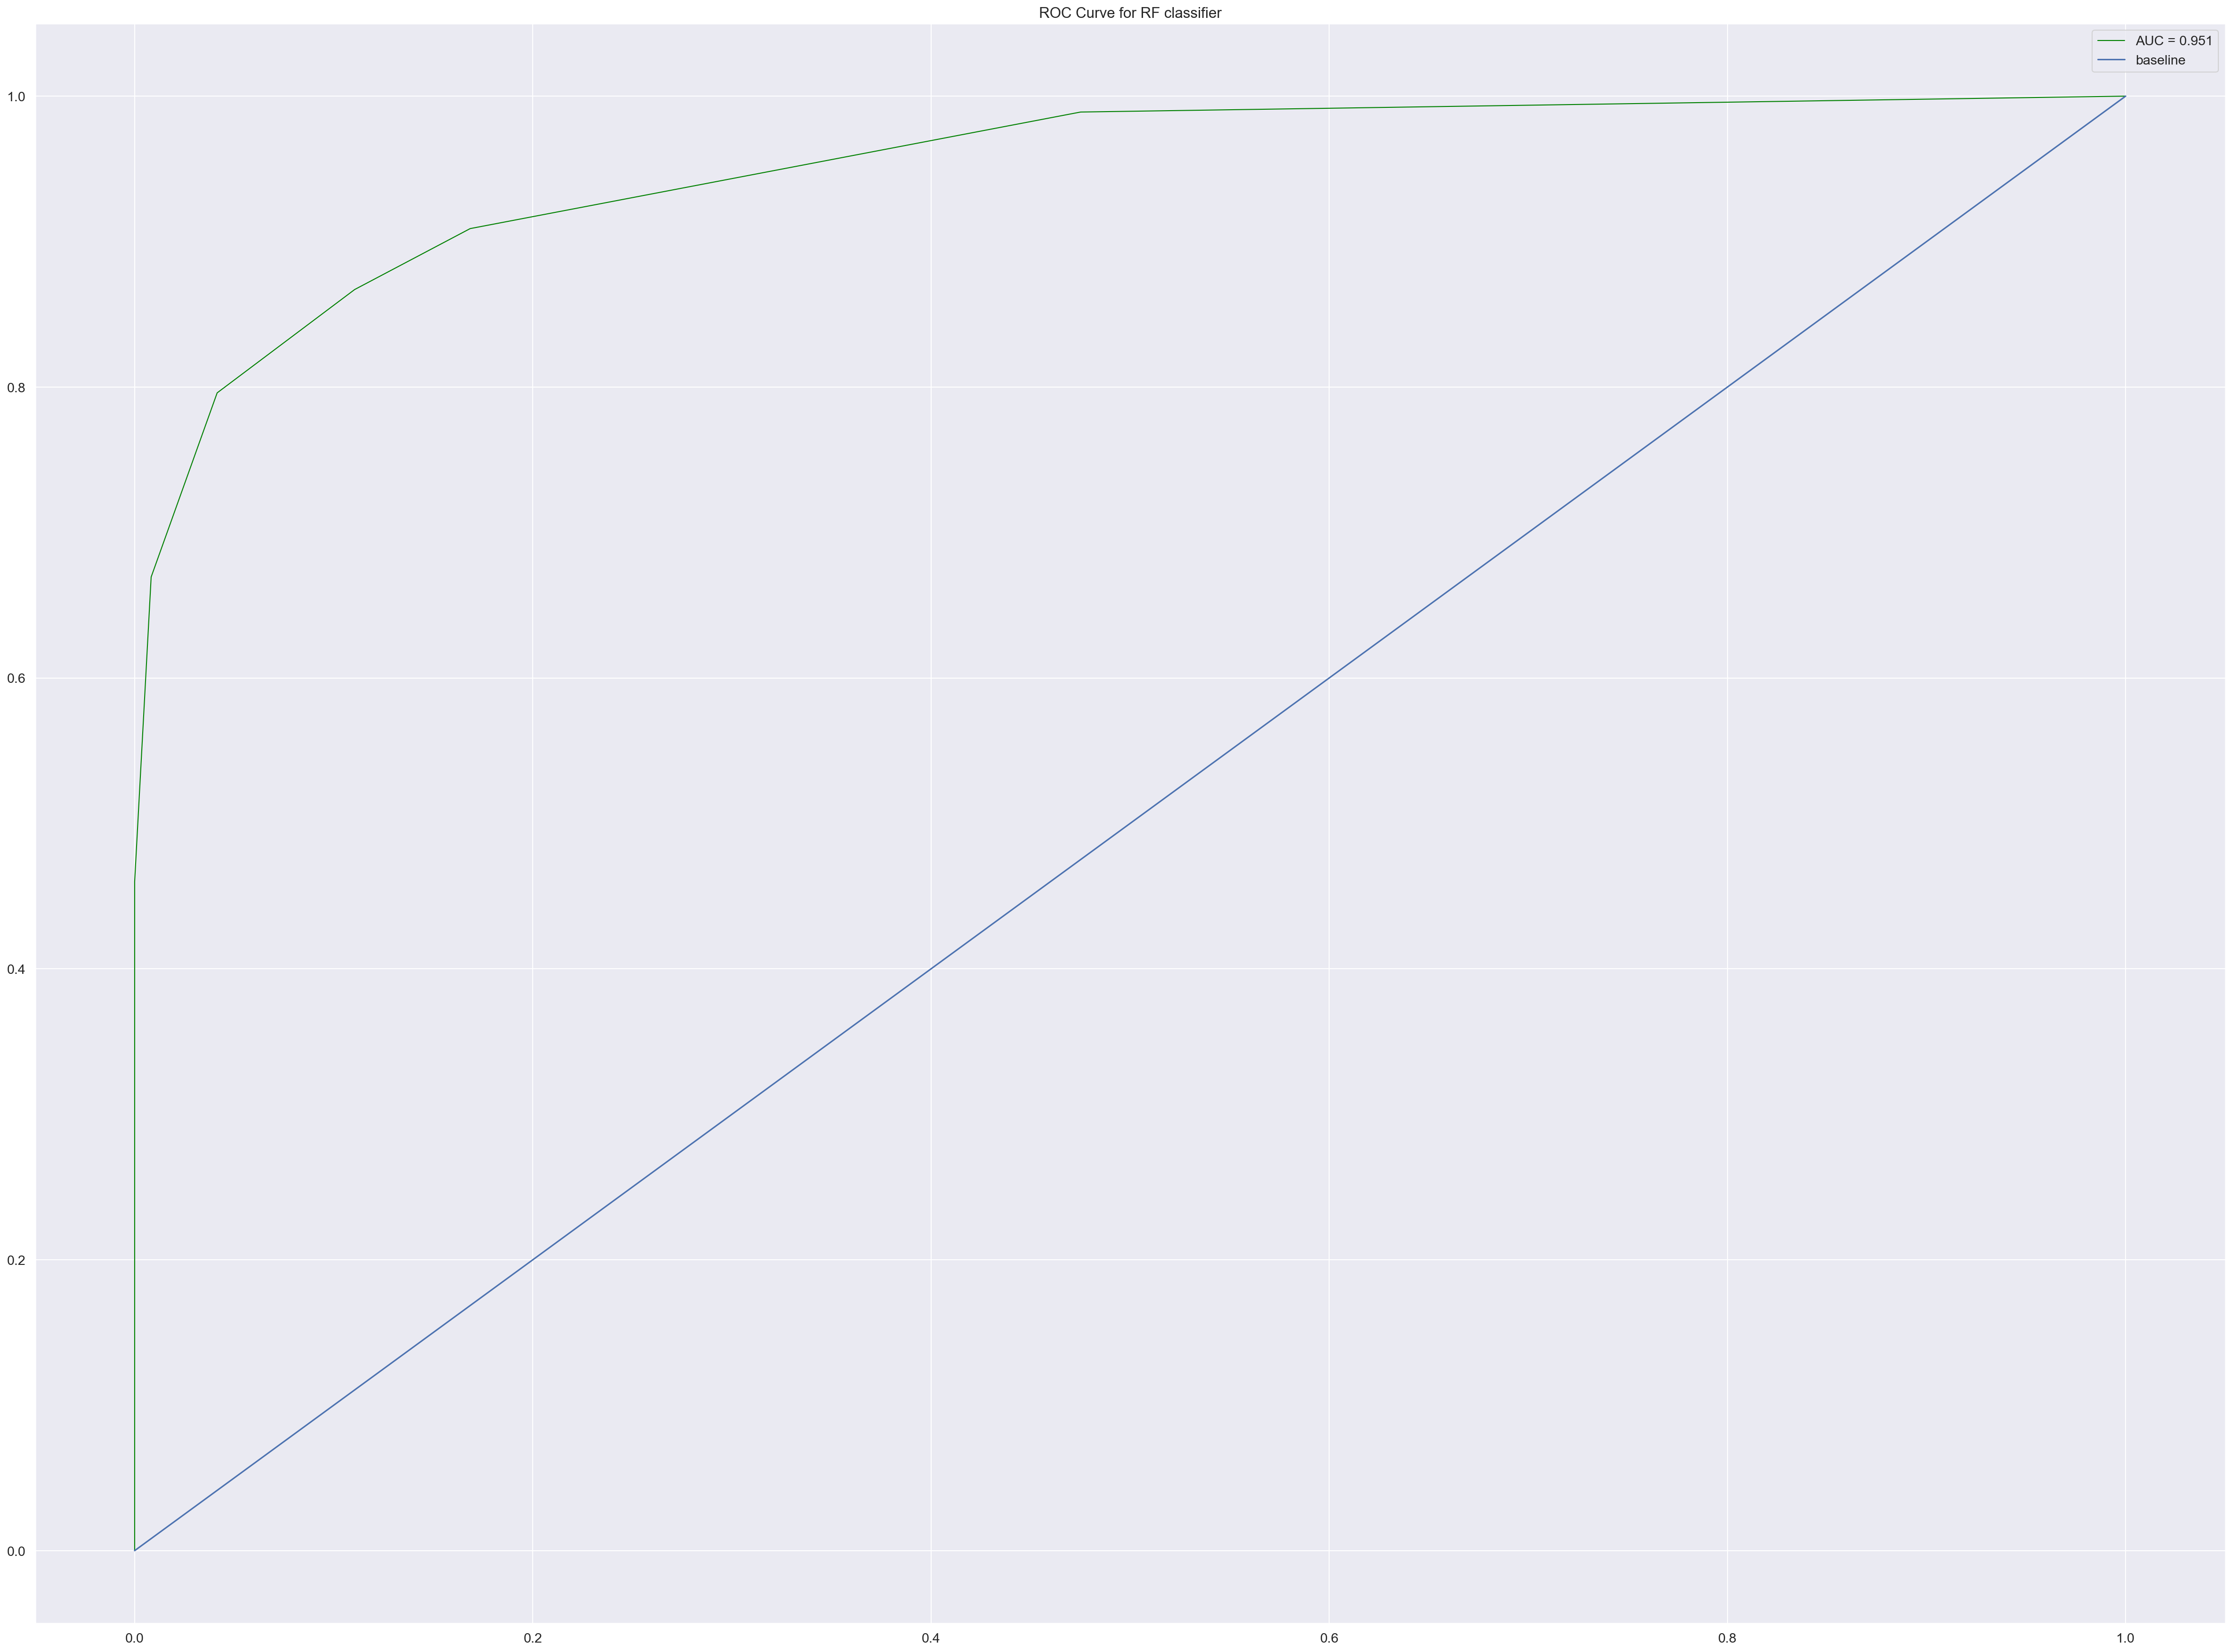

In [97]:
# get false and true positive rates
fpr, tpr, thresholds = roc_curve(train_a, prb[:,0], pos_label=0)
base_fpr, base_tpr, _ = roc_curve(train_a, [1 for _ in range(len(train_a))])
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier')
plt.rcParams['font.size'] = 60
    # Plot both curves
plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
plt.legend();

In [98]:
#Aplicando la curva AUC de 0.951 lo que nos indica que el modelo da un valor bueno, 
#aun cuando solo se usaron 3 variables en el modelo, aplicando las 3 siguientes variables da un aumento de 0.02.

In [99]:

#Gradient Boost

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
        max_depth=1, random_state=0).fit(train_b, train_a)

clf.score(train_b, train_a)

confusion_matrix(train_a, clf.predict(train_b))

target_names = ["OverallQual","GrLivArea","GarageCars"]
print(classification_report(train_a, clf.predict(train_b)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1098
           1       0.88      0.80      0.84       362

    accuracy                           0.93      1460
   macro avg       0.91      0.88      0.90      1460
weighted avg       0.92      0.93      0.92      1460



In [101]:
# SE PUEDE OBSERVAR QUE LOS INDICADORES EN ESTE CASO TAMBIEN DAN VALORES ALTOS.
#CONCLUSION

# EL MODELO EN GENERAL DA COMO RESULTADO BUENOS INDICADORES, POR ENCIMA DEL 80% USANDO LAS 3 VARIABLES MAS SIGNIFICATIVAS
# DE LA DATA.

#TANTO EN EL ALGORITMO DE GRADIENT BOOSTING Y ARBOL DE DESICION SE OBSERVAN VALORES SIMILARES EN CUANTO SUS INDICADORES

# LA GRAFICA AUC MUESTRA UN VALOR POSITIVO PARA EL MODELO, YA QUE ALCANZA UN VALOR DE 0.951.